# Full Data Analysis of Covid in india

In [260]:
import numpy as np
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt

In [261]:
df = pd.read_csv('StatewiseTestingDetails.csv')

In [262]:
df.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210.0,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-04-02,Andhra Pradesh,1800.0,1175.0,132.0


In [263]:
df['State']=df['State'].apply(str)

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 5 columns):
Date            759 non-null object
State           759 non-null object
TotalSamples    759 non-null float64
Negative        623 non-null float64
Positive        750 non-null float64
dtypes: float64(3), object(2)
memory usage: 29.8+ KB


In [265]:
df.fillna(value=0, inplace=True)

In [266]:
data=pd.read_csv('covid_19_india.csv')

In [267]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1671 entries, 0 to 1670
Data columns (total 9 columns):
Sno                         1671 non-null int64
Date                        1671 non-null object
Time                        1671 non-null object
State/UnionTerritory        1671 non-null object
ConfirmedIndianNational     1671 non-null object
ConfirmedForeignNational    1671 non-null object
Cured                       1671 non-null int64
Deaths                      1671 non-null int64
Confirmed                   1671 non-null int64
dtypes: int64(4), object(5)
memory usage: 117.6+ KB


In [268]:
data.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [269]:
data.fillna(value=-1, inplace=True)

In [270]:
def plot_var(var='Positive',
             state='Tamil Nadu'):
    """
    Plots a bar chart of the given variable over the date range
    """
    assert type(var)==str, "Expected string as the variable name"
    assert type(state)==str, "Expected string as the state name"
 
    y = df[df['State']==state][var]
    x = df[df['State']==state]['Date']
    plt.figure(figsize=(15,4))
    plt.title("Plot of \"{}\" for {}".format(var,state),fontsize=18)
    plt.bar(x=x,height=y,edgecolor='k',color='brown')
    plt.grid(True)
    plt.xticks(fontsize=14,rotation=45)
    plt.yticks(fontsize=14)
    plt.show()

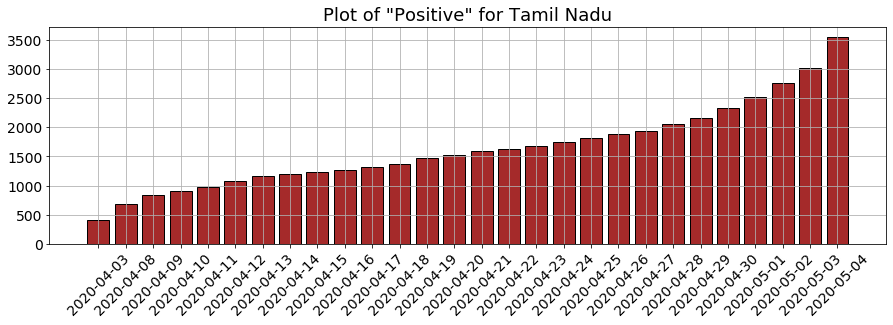

In [271]:
plot_var()

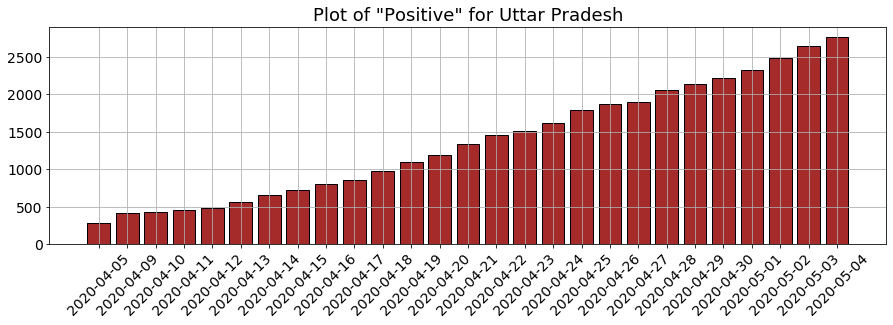

In [272]:
plot_var(state='Uttar Pradesh')

In [273]:
def fatality_ratio(state):
    """
    Computes the fatality ratio for the given state
    Fatality ratio is the ratio of total dead to total confirmed case
    """
    
    date = data.iloc[1670]['Date']
    try:
        d = float(data[(data['State/UnionTerritory']==state) & (data['Date']==date)]['Deaths'])
        p = float(data[(data['State/UnionTerritory']==state) & (data['Date']==date)]['Confirmed'])
    except:
        return -1
    
    if (d!=-1.0) and (p!=-1.0) and (p!=0):
        return round(d/p,3)
    else:
        return -1

In [274]:
def recovery_ratio(state):
    """
    Computes the recovery ratio for the given state
    Recovery ratio is the ratio of total recovered cases to total positive cases
    """
    
    date = data.iloc[1670]['Date']
    try:
        r = float(data[(data['State/UnionTerritory']==state) & (data['Date']==date)]['Cured'])
        p = float(data[(data['State/UnionTerritory']==state) & (data['Date']==date)]['Confirmed'])
    except:
        return -1
    
    if (r!=-1.0) and (p!=-1.0) and (p!=0):
        return round(r/p,3)
    else:
        return -1

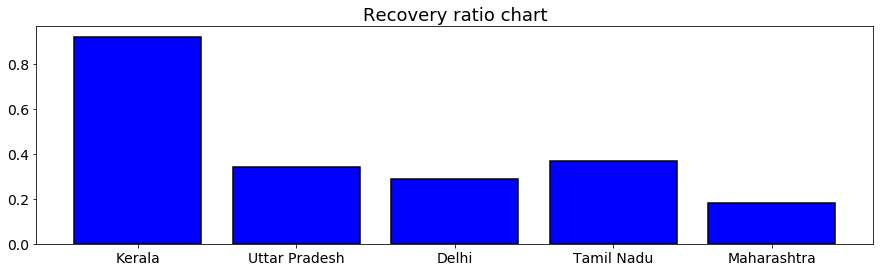

In [275]:
states = ['Kerala','Uttar Pradesh','Delhi','Tamil Nadu','Maharashtra']
fr,x = [],[]
for s in states:
    data1 = recovery_ratio(s)
    if data1!=-1:
        fr.append(data1)
        x.append(s)

plt.figure(figsize=(15,4))
plt.title("Recovery ratio chart",fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.bar(x=x,height=fr,color='blue',
        edgecolor='k',linewidth=1.5)
plt.show()

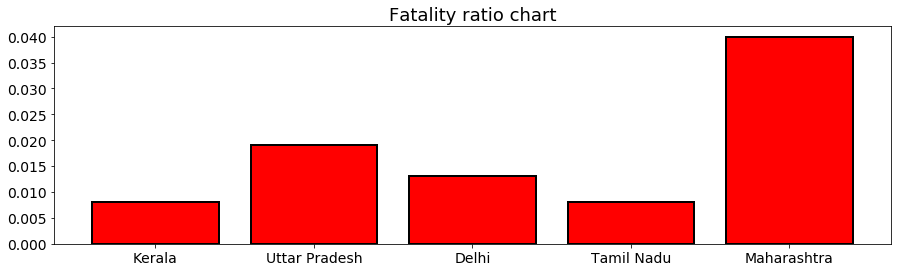

In [276]:
states = ['Kerala','Uttar Pradesh','Delhi','Tamil Nadu','Maharashtra']
fr,x = [],[]
for s in states:
    data1 = fatality_ratio(s)
    if data1!=-1:
        fr.append(data1)
        x.append(s)

plt.figure(figsize=(15,4))
plt.title("Fatality ratio chart",fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.bar(x=x,height=fr,color='red',
        edgecolor='k',linewidth=2)
plt.show()

In [277]:
def plotTesting(lst_states=['Kerala','Uttar Pradesh','Delhi','Tamil Nadu','Maharashtra']):
    """
    Plots the cumulative testing done by the given list of states
    """
    legends = []
    plt.figure(figsize=(10,5))
    plt.title("Total test results",fontsize=18)
    for s in lst_states:
        data = np.array(df[df['State']==s]['TotalSamples'])
        slope = int((data[-1]-data[0])/len(data))
        plt.plot(data,linewidth=2)
        plt.text(x=len(data)-2,y=data[-1]*1.05,s=s,fontsize=14)
        legends.append(str(slope)+" tests/day in " + s)
    plt.legend(legends,fontsize=14)
    plt.grid(True)
    plt.xlim(0,len(data)+2)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel("Days",fontsize=16)
    plt.ylabel("Total test results",fontsize=16)
    plt.show()

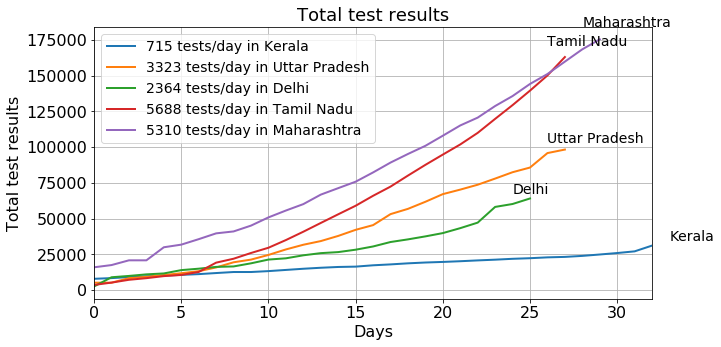

In [278]:
plotTesting()

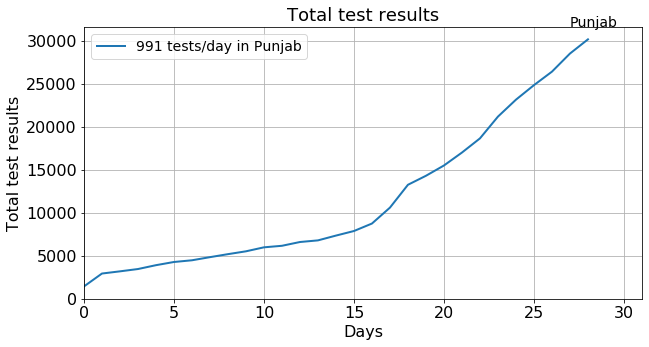

In [279]:
plotTesting(['Punjab'])

In [280]:
def plot_xy(varx='Confirmed',
            vary='Cured',
            state='Maharashtra'):
    """
    Plots a bar chart of the given variable over the date range
    """
    assert type(varx)==str, "Expected string as the variable x name"
    assert type(vary)==str, "Expected string as the variable y name"
 
    y = data[data['State/UnionTerritory']==state][vary]
    x = data[data['State/UnionTerritory']==state][varx]
    if (x.nunique()!=1) and (y.nunique()!=1):
        plt.figure(figsize=(12,4))
        plt.title("Plot of \"{}\" vs. \"{}\" for {}".format(varx,vary,state),fontsize=18)
        plt.scatter(x=x,y=y,edgecolor='k',color='green',s=100)
        plt.grid(True)
        plt.xticks(fontsize=14,rotation=45)
        plt.yticks(fontsize=14)
        plt.show()
    else:
        print("Some of the data unavailable for a scatter plot. Sorry!")

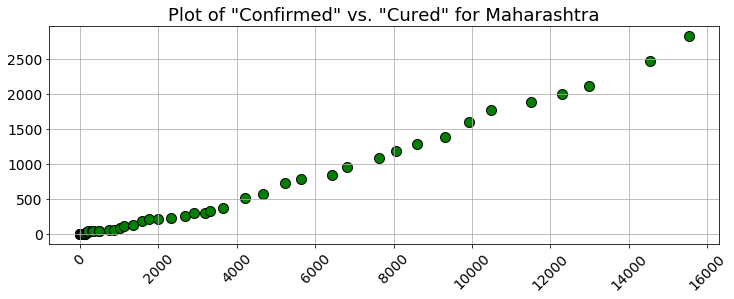

In [281]:
plot_xy()

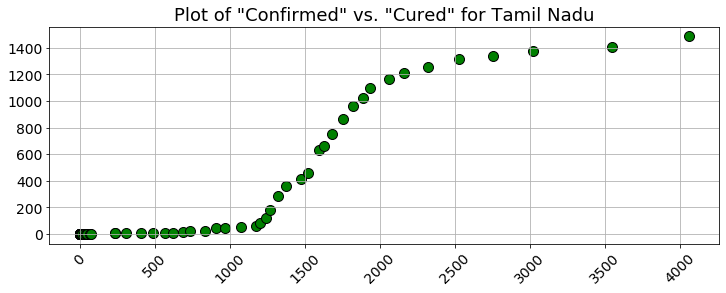

In [282]:
plot_xy(state='Tamil Nadu')

In [283]:
def positiveTest_ratio(state='Tamil Nadu'):
    """
    Computes the test-positive ratio for the given state
    Test-positive ratio is the ratio of total positive cases to total number of tests
    """
    
    date = df.iloc[1]['Date']
    try:
        p = float(df[(df['State']==state) & (df['Date']==date)]['Positive'])
        t = float(df[(df['State']==state) & (df['Date']==date)]['TotalSamples'])
    except:
        return -1
    
    if (p!=-1.0) and (t!=-1.0) and (t!=0):
        return round(p/t,3)
    else:
        return -1

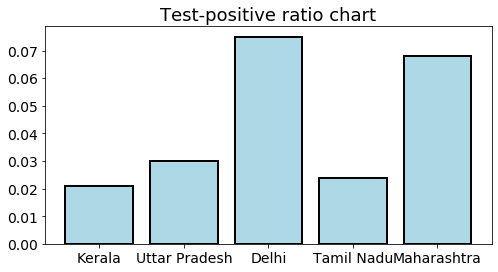

In [284]:
states = ['Kerala','Uttar Pradesh','Delhi','Tamil Nadu','Maharashtra']
tp,x = [],[]
for s in states:
    data1 = positiveTest_ratio(s)
    if data1!=-1:
        tp.append(data1)
        x.append(s)
plt.figure(figsize=(8,4))
plt.title("Test-positive ratio chart",fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.bar(x=x,height=tp,color='lightblue',
        edgecolor='k',linewidth=2)
plt.show()

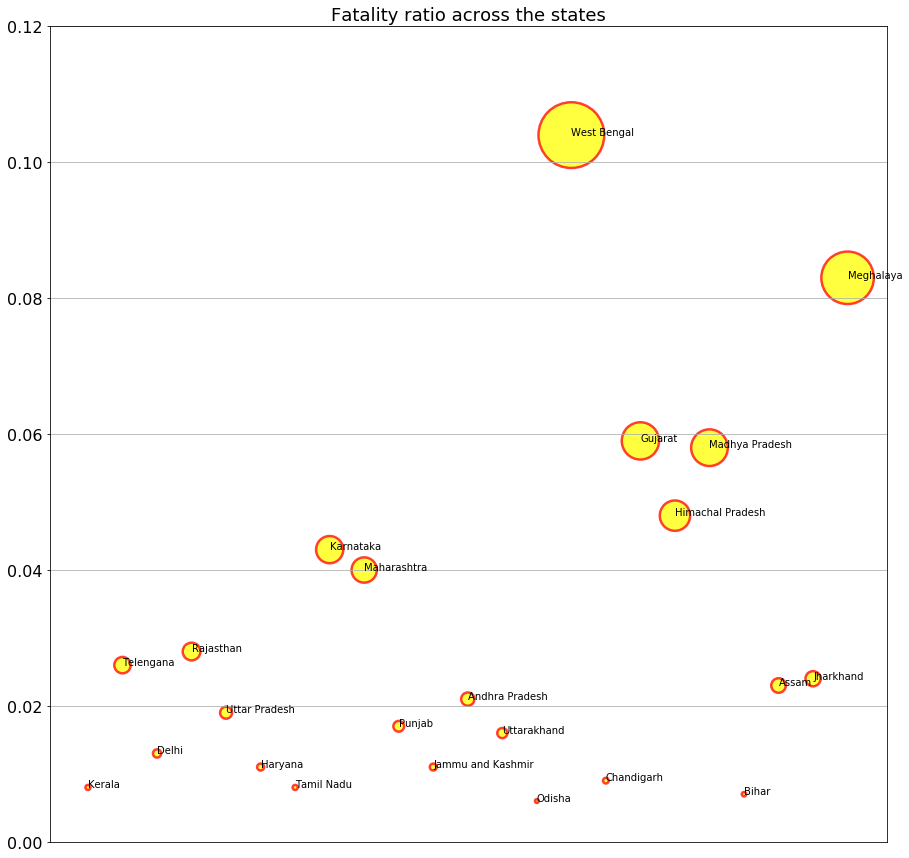

In [285]:
data=pd.read_csv('covid_19_india.csv')
data.fillna(value=0, inplace=True)
states = list(data['State/UnionTerritory'].unique())
for s in ['Manipur','Mizoram','Andaman and Nicobar Islands','Arunachal Pradesh','Ladakh','Chhattisgarh','Tripura','Goa','Dadar Nagar Haveli','Puducherry']:
    try:
        states.remove(s)
    except:
        pass

fr,x = [],[]
for s in states:
    data1 = fatality_ratio(s)
    if data1!=-1:
        fr.append(data1)
        x.append(s)
fr = np.array(fr)
plt.figure(figsize=(15,15))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.title("Fatality ratio across the states",fontsize=18)
plt.scatter(x=x,y=fr,
            s=4e5*fr**2,
            color='yellow',edgecolor='red',alpha=0.75,linewidth=2.5)
#plt.xticks(rotation=45,fontsize=12)
for i,s in enumerate(x):
    plt.annotate(s=s,xy=(x[i],fr[i]))
plt.ylim(0,0.12)
plt.yticks(fontsize=16)
plt.grid(True,axis='y')
plt.show()

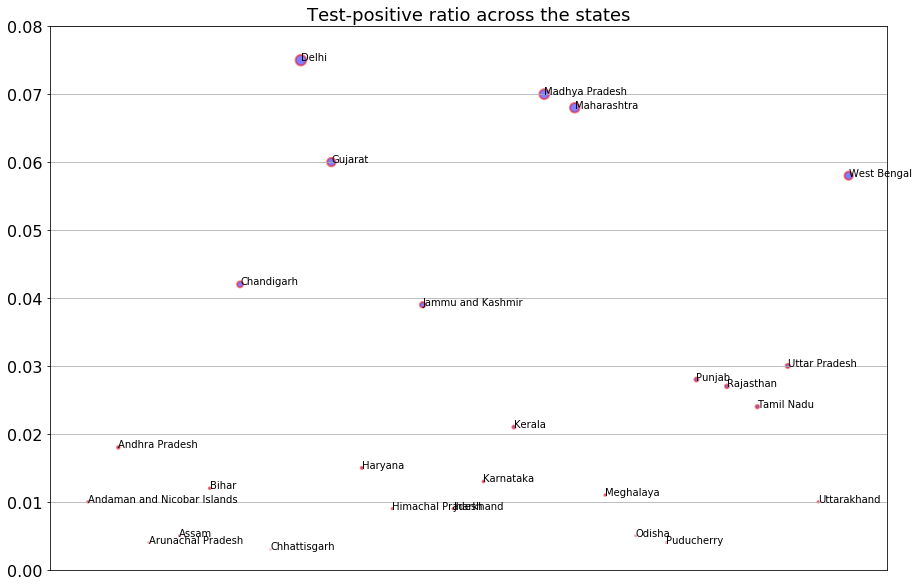

In [286]:
states = list(df['State'].unique())
for s in ['AS','GU','MP','PU','VI']:
    try:
        states.remove(s)
    except:
        pass

tp,x = [],[]
for s in states:
    data1 = positiveTest_ratio(s)
    if data1!=-1:
        tp.append(data1)
        x.append(s)
tp = np.array(tp)
plt.figure(figsize=(15,10))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.title("Test-positive ratio across the states",fontsize=18)
plt.scatter(x=x,y=tp,
            s=2e4*tp**2,
            color='blue',edgecolor='red',alpha=0.5,linewidth=2)
plt.xticks(rotation=90,fontsize=12)
for i,s in enumerate(x):
    plt.annotate(s=s,xy=(x[i],tp[i]))
plt.ylim(0,0.08)
plt.yticks(fontsize=16)
plt.grid(True,axis='y')
plt.show()

In [287]:
def caseCountsdecrease(days=14,state='Kerala'):
    """
    Determines whether the given state has a decreasing case counts for given number of days
    Arguments:
            days: Number of days to go back
            state: Name of the state (a string)
    Returns:
            A tuple containing the successive difference vector (of new cases) and
            the number of negative quantities in that vector. When all the quantities are negative,
            the state has shown consistent decrease in new cases for the given number of days.
    """
    positiveIncrease = np.array(df[df['State']==state]['Positive'][:days+1])
    diff = np.diff(positiveIncrease)
    countofNeg = np.sum(diff <= 0, axis=0)
    return (countofNeg, diff)

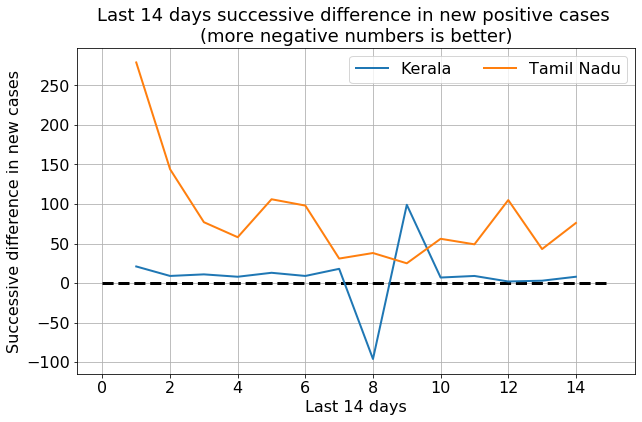

In [288]:
states = ['Kerala','Tamil Nadu']
cd = []
x = np.arange(1,15,1)
plt.figure(figsize=(10,6))
plt.title("Last 14 days successive difference in new positive cases \n(more negative numbers is better)",
          fontsize=18)
for s in states:
    _,data = caseCountsdecrease(days=14,state=s)
    plt.plot(x,data,linewidth=2)
plt.legend(states,fontsize=16,ncol=2)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Last 14 days",fontsize=16)
plt.ylabel("Successive difference in new cases",fontsize=16)
plt.hlines(y=0,xmin=0,xmax=15,linestyles='--',lw=3)
plt.show()

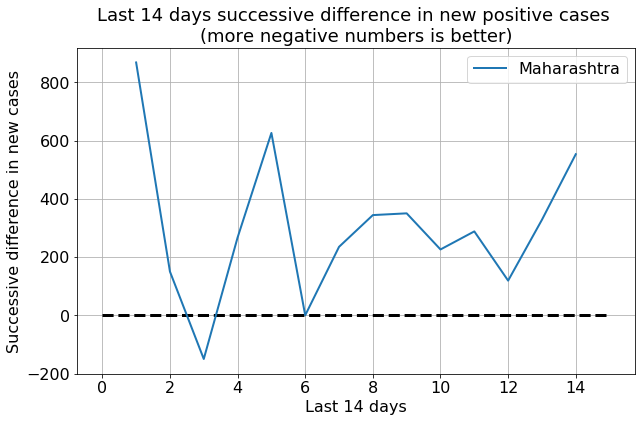

In [289]:
states = ['Maharashtra']
cd = []
x = np.arange(1,15,1)
plt.figure(figsize=(10,6))
plt.title("Last 14 days successive difference in new positive cases \n(more negative numbers is better)",
          fontsize=18)
for s in states:
    _,data = caseCountsdecrease(days=14,state=s)
    plt.plot(x,data,linewidth=2)
plt.legend(states,fontsize=16,ncol=2)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Last 14 days",fontsize=16)
plt.ylabel("Successive difference in new cases",fontsize=16)
plt.hlines(y=0,xmin=0,xmax=15,linestyles='--',lw=3)
plt.show()

In [290]:
dataset=pd.read_csv('AgeGroupDetails.csv')

In [291]:
dataset.head()

,Sno,AgeGroup,TotalCases,Percentage
0,1,5.0,22,3.80
1,2,15.0,27,3.90
2,3,25.0,172,24.86
3,4,35.0,146,21.10
4,5,45.0,112,16.18


In [292]:
dataset.fillna(value=90, inplace=True)

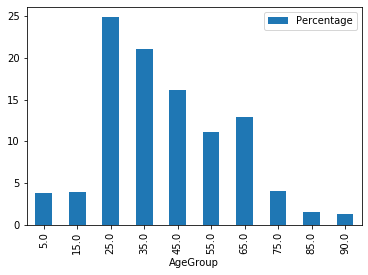

In [293]:
dataset.plot(x='AgeGroup', y='Percentage',kind='bar')

In [294]:
dataset1=pd.read_csv('IndividualDetails.csv')
dataset1.head()

,id,government_id,diagnosed_date,age,gender,detected_city,detected_district,detected_state,nationality,current_status,status_change_date,notes
0,0,KL-TS-P1,30/01/2020,20,F,Thrissur,Thrissur,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
1,1,KL-AL-P1,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
2,2,KL-KS-P1,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
3,3,DL-P1,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,India,Recovered,15/03/2020,"Travelled from Austria, Italy"
4,4,TS-P1,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,India,Recovered,02/03/2020,"Travelled from Dubai to Bangalore on 20th Feb,..."


In [295]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27890 entries, 0 to 27889
Data columns (total 12 columns):
id                    27890 non-null int64
government_id         2997 non-null object
diagnosed_date        27890 non-null object
age                   2346 non-null object
gender                5313 non-null object
detected_city         2347 non-null object
detected_district     20240 non-null object
detected_state        27890 non-null object
nationality           2707 non-null object
current_status        27890 non-null object
status_change_date    27780 non-null object
notes                 26555 non-null object
dtypes: int64(1), object(11)
memory usage: 2.6+ MB


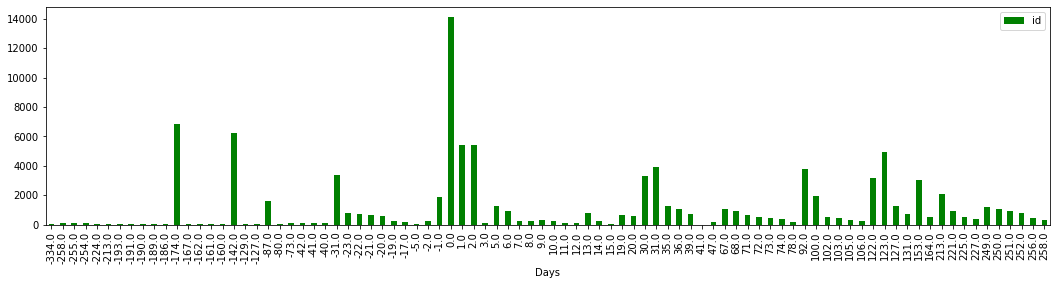

In [330]:
'''Date of diagnosis'''
dataset1['diagnosed_date'] = pd.to_datetime(dataset1['diagnosed_date'])

'''Status change date'''
dataset1['status_change_date'] = pd.to_datetime(dataset1['status_change_date'])

'''no of days in Days'''
dataset1['Days']=(dataset1['status_change_date']-dataset1['diagnosed_date'])

'''converting days in float'''
dataset1['Days'] = dataset1['Days'] / np.timedelta64(1, 'D')

'''plotting the Days'''
plt=dataset1.groupby('Days').mean().plot(kind='bar',figsize=(18,4),color='green')

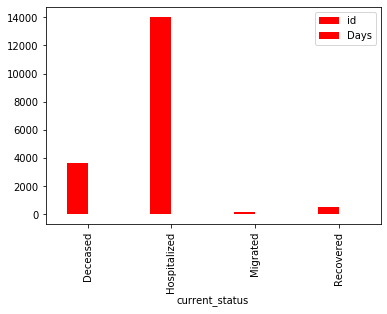

In [297]:
plt=dataset1.groupby("current_status").mean().plot(kind='bar',color='red')

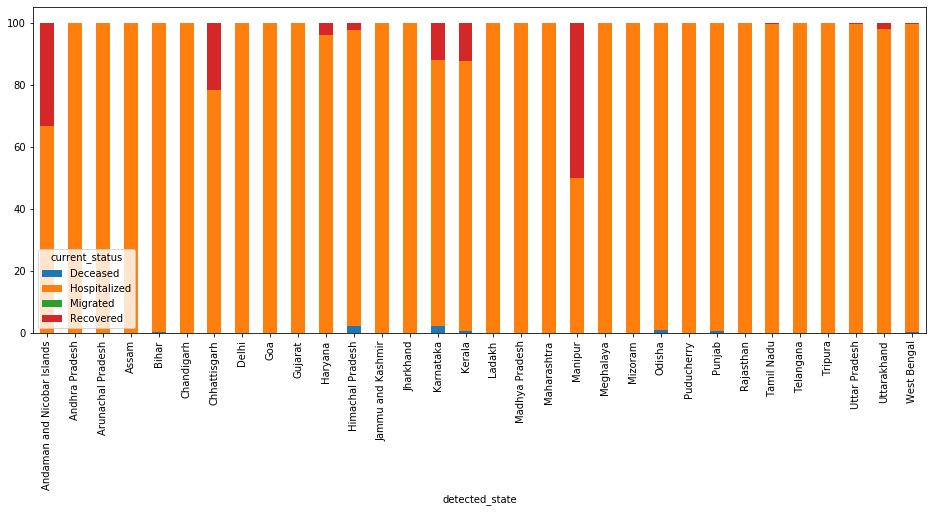

In [328]:
plt=dataset1.groupby(['detected_state','current_status']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot(figsize=(16,6),kind='bar',stacked=True)

In [298]:
def travel(list1):
    """
    Computes the the no of positive cases due to the 
    travel from  countries present in list1
    """
    
    dict={}
    #dict['Other Travel']=0
    for i in list1:
        dict[i]=0
    c=0
    for i in dataset1['notes']:
        i=str(i)
        for j in dict:
            if(j in i):
                dict[j]=dict[j]+1
        if("Travelled" in i):
            c=c+1
    d=c-sum(dict.values())
    #dict["Other Travel"]=d
    return dict

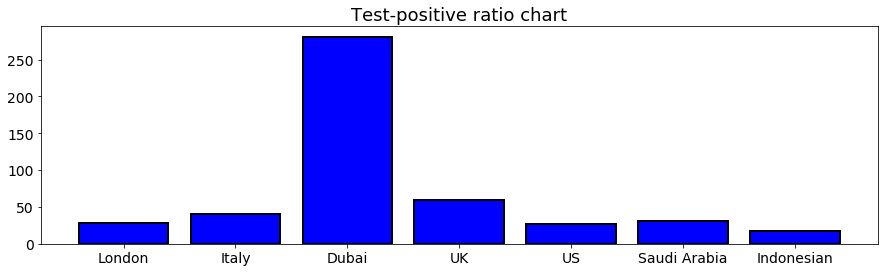

In [299]:
import matplotlib.pyplot as plt
list2=["London","Italy","Dubai","UK","US","Saudi Arabia","Indonesian"]
dict1=travel(list2)

"""
Plotting a bar chart of the given values
"""
plt.figure(figsize=(15,4))
plt.title("Test-positive ratio chart",fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.bar(x=dict1.keys(),height=dict1.values(),color='blue',
        edgecolor='k',linewidth=2)
plt.show()

In [300]:
def covidreason():
    """
    Computes the the no of positive cases due to the 
    travel from  countries and due to some contact with patient
    """
    
    dict={}
    dict['Travelled']=0
    dict['In Contact with Patient']=0
    awaited=0
    for i in dataset1['notes']:
        i=str(i)
        if("Hospital" in i or "Doctor" in i or "Family" in i or "Father" in i or "Mother" in i or "Son" in i or 
           "Daughter" in i or "Relative" in i or "Wife" in i or "Friend" in i or "Friends" in i or 
           "family" in i or "Sister" in i or "Relative" in i):
            dict['In Contact with Patient']=dict['In Contact with Patient']+1
        if("Travelled" in i):
            dict['Travelled']=dict['Travelled']+1
        if("Details awaited" in i or "Details Awaited" in i):
            awaited=awaited+1
    return dict

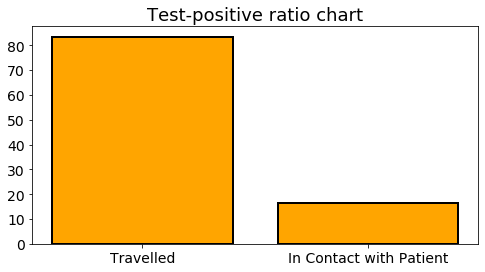

In [301]:
a=covidreason()

"""
Plotting a bar chart of the given values in percentage
"""

l1=[]
l2=[]
s=sum(a.values())
for i in a:
    l1.append(i)
    l2.append(a[i]/s*100)
plt.figure(figsize=(8,4))
plt.title("Test-positive ratio chart",fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.bar(x=l1,height=l2,color='orange',
        edgecolor='k',linewidth=2)
plt.show()